In [1]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [2]:
from imutils import paths
import cv2

In [3]:
imagePaths=list(paths.list_images("c:\images"))

In [4]:
imagePaths

['c:\\images\\kane_(5).jpg',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson1.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson10.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson2.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson3.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson4.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson5.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson6.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson7.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson8.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kane Williamson\\Kane Williamson9.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kobe Bryant\\Kobe Bryant1.png',
 'c:\\images\\Sports-celebrity images\\cr\\Kobe Bryant\\Kobe Brya

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img=cv2.imread("C:\\images\\Sports-celebrity images\\Ronaldo\\ronaldo_(88).jpg")

In [7]:
img.shape

(612, 490, 3)

In [8]:
cap = cv2.VideoCapture(0)
ret,im = cap.read()

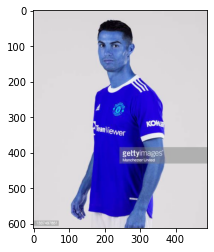

In [9]:
plt.imshow(img)

In [10]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(612, 490)

In [11]:
gray

array([[216, 216, 216, ..., 213, 213, 213],
       [216, 216, 216, ..., 213, 213, 213],
       [216, 216, 216, ..., 213, 213, 213],
       ...,
       [219, 219, 219, ..., 218, 218, 218],
       [219, 219, 219, ..., 218, 218, 218],
       [219, 219, 219, ..., 218, 218, 218]], dtype=uint8)

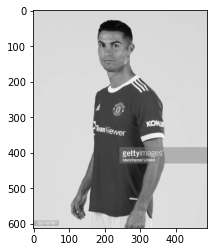

In [12]:
plt.imshow(gray,cmap='gray')

In [13]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [14]:
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[165,  60,  98,  98]])

In [15]:
(x,y,w,h)=faces[0]
x,y,w,h

(165, 60, 98, 98)

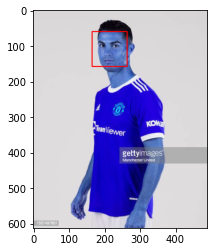

In [16]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

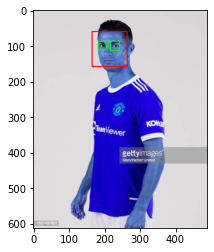

In [17]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

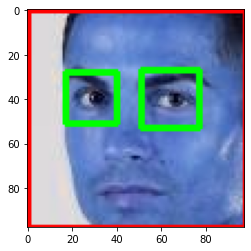

In [18]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [19]:
cropped_img=np.array(roi_color)
cropped_img.shape

(98, 98, 3)

In [20]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray /=255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;
    
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H=np.uint8(imArray_H)
    return imArray_H
    

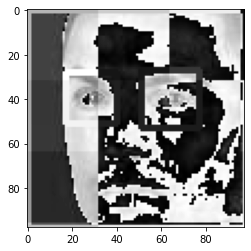

In [21]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [22]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

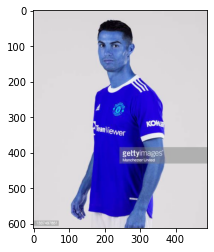

In [23]:
original_img=cv2.imread("C:\\images\\Sports-celebrity images\\Ronaldo\\ronaldo_(88).jpg")
plt.imshow(original_img)

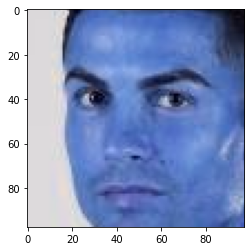

In [24]:
cropped_image=get_cropped_image_if_2_eyes('C:\\images\\Sports-celebrity images\\Ronaldo\\ronaldo_(88).jpg')
plt.imshow(cropped_image)

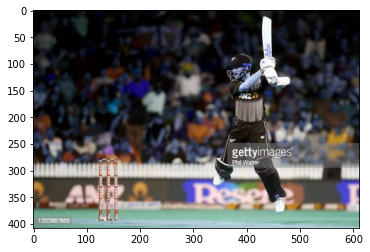

In [25]:
org_img_obstructed=cv2.imread("C:\images\kane_(5).jpg")
plt.imshow(org_img_obstructed)

In [26]:
crop_image=get_cropped_image_if_2_eyes('C:\images\kane_(5).jpg')
crop_image

In [27]:
path_to_data='C:/images/Sports-celebrity images/'
path_to_cr_data='C:/images/Sports-celebrity images/cr/'

In [28]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [29]:
img_dirs

['C:/images/Sports-celebrity images/cr',
 'C:/images/Sports-celebrity images/Kane Williamson',
 'C:/images/Sports-celebrity images/Kobe Bryant',
 'C:/images/Sports-celebrity images/Maria Sharapova',
 'C:/images/Sports-celebrity images/Ronaldo']

In [30]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [31]:
cropped_img_dirs=[]
celebrity_file_name_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
   
    
    celebrity_file_name_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("generate crop image folder:",cropped_folder)
            cropped_file_name=celebrity_name + str(count) +".png"
            cropped_file_path=cropped_folder + "/" +cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count +=1

generate crop image folder: C:/images/Sports-celebrity images/cr/Kane Williamson
generate crop image folder: C:/images/Sports-celebrity images/cr/Kobe Bryant
generate crop image folder: C:/images/Sports-celebrity images/cr/Maria Sharapova
generate crop image folder: C:/images/Sports-celebrity images/cr/Ronaldo


In [32]:
celebrity_file_dict={}
for img_dir in cropped_img_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_dict[celebrity_name]=file_list
celebrity_file_dict
    

{'Kane Williamson': ['C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson1.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson10.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson2.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson3.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson4.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson5.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson6.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson7.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson8.png',
  'C:/images/Sports-celebrity images/cr/Kane Williamson\\Kane Williamson9.png'],
 'Kobe Bryant': ['C:/images/Sports-celebrity images/cr/Kobe Bryant\\Kobe Bryant1.png',
  'C:/images/Sports-celebrity images/cr/Kobe Bryant\\Kobe Bryant10.png',
  'C:/images/Sports

In [33]:
class_dict={}
count=0
for celebrity_name in celebrity_file_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'Kane Williamson': 0, 'Kobe Bryant': 1, 'Maria Sharapova': 2, 'Ronaldo': 3}

In [34]:
x,y=[],[]
for celebrity_name,training_files in celebrity_file_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [35]:
len(x[0])

4096

In [36]:
32*32*3 + 32*32

4096

In [37]:
x[0]

array([[ 40],
       [ 25],
       [ 27],
       ...,
       [143],
       [ 83],
       [175]], dtype=uint8)

In [38]:
y[0]

0

In [39]:
import numpy as np
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(77, 4096)

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.65

In [42]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         7
           3       0.56      1.00      0.72         9

    accuracy                           0.65        20
   macro avg       0.64      0.75      0.68        20
weighted avg       0.45      0.65      0.52        20



C:\Users\akshay desale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay desale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay desale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params ={
    'svm':{
        'model':svm.SVC(gamma="auto",probability=True),
        'params':{
            'svc__C':[1,10,100],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [45]:
scores=[]
best_estimators={}
import pandas as pd
for algo ,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe, mp['params'], cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
df1=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.704545,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.700000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.722727,{'logisticregression__C': 10}


In [46]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [47]:
best_estimators['svm'].score(x_test,y_test)

0.75

In [48]:
best_estimators['random_forest'].score(x_test,y_test)

0.4

In [49]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.75

In [50]:
best_clf=best_estimators['svm']

In [51]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,best_clf.predict(x_test))
c

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 2, 5],
       [0, 0, 0, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

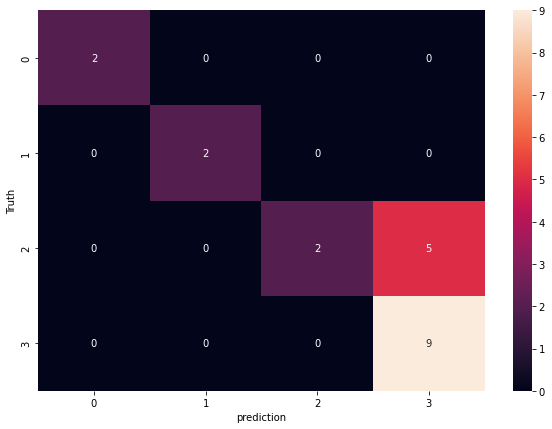

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c,annot=True)
plt.xlabel('prediction')
plt.ylabel('Truth')

In [53]:
class_dict

{'Kane Williamson': 0, 'Kobe Bryant': 1, 'Maria Sharapova': 2, 'Ronaldo': 3}

In [54]:
!pip install joblib
import joblib
joblib.dump(best_clf,'Saved_Model.pkl')

['Saved_Model.pkl']